In [18]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

In [19]:
# Liste des noms de fichiers FITS
fichiers_fits = ['MAST_2023-11-10T04301/JWST/jw02739-o002_t001_miri_f1130w/jw02739-o002_t001_miri_f1130w_i2d.fits',
                'MAST_2023-11-10T04301/JWST/jw02739-o002_t001_miri_f1500w/jw02739-o002_t001_miri_f1500w_i2d.fits',
                'MAST_2023-11-10T04302/JWST/jw02739-o002_t001_miri_f770w/jw02739-o002_t001_miri_f770w_i2d.fits',
                'MAST_2023-11-10T04302/JWST/jw02739-o002_t001_miri_f1130w/jw02739-o002_t001_miri_f1130w_i2d.fits']
            

L'idée ici est d'organiser différents fichiers FITS d'un même objet, plus précisément d'une même partie d'un objet céleste, dans une array. Il est crucial de veiller à ce que chaque fichier FITS soit distinct, c'est-à-dire que leurs coordonnées et leurs filtres respectifs diffèrent.

De plus, lors du téléchargement de dossiers sur MAST, on trouve généralement plusieurs fichiers FITS différents dans un même dossier :

_i2d.fits (Image 2D) : utilisé pour indiquer des images 2D qui ont été traitées ou réduites d'une manière ou d'une autre. Les images _i2d sont souvent les images finales utilisées pour l'analyse scientifique.

_segm.fits (Segmentation) : indique souvent des fichiers qui contiennent des cartes de segmentation. Une carte de segmentation divise une image en différentes régions ou segments, généralement en fonction de critères tels que la luminosité ou la forme. Ces cartes de segmentation peuvent être utilisées pour identifier et étudier des régions spécifiques d'intérêt dans une image.

_cat.fits (Catalogue) : utilisé pour des fichiers qui contiennent des catalogues d'objets détectés dans une image. Ces catalogues fournissent généralement des informations sur les positions, magnitudes et autres caractéristiques des objets. Les catalogues peuvent être utilisés pour l'identification et l'étude des objets dans une image, ainsi que pour des analyses statistiques.

Dans cet exemple, l'extension des fichiers FITS doit être _i2d afin de travailler directement sur les images finales.

In [20]:
canaux = []

for fichier in fichiers_fits:
    hdul = fits.open(fichier)
    data = hdul[1].data
    canaux.append(data)

for i in range(len(canaux)):
    canaux[i] = (canaux[i] - np.min(canaux[i])) / (np.max(canaux[i]) - np.min(canaux[i]))


Une fois que tous les fichiers FITS ont été intégrés dans notre array, nous procéderons ensuite à stocker dans une autre array les informations (appelée ici "data") contenues dans chaque fichier. 
Nous entreprendrons ensuite la normalisation de chaque valeur de notre nouvelle array "data" de manière à ce que les valeurs de chaque fichier soient ajustées à l'échelle dans la plage [0, 1]. 
Cette démarche garantit que les intensités des différents canaux sont comparables et peuvent être interprétées de manière appropriée pour générer une image visuellement cohérente.

In [21]:
image_couleur = 0 * canaux[1] + 1.5 * canaux[2] + 1.5 * canaux[3] + 1.5 * canaux[0]
#image_couleur = np.stack([red_channel, green_channel, blue_channel], axis=-1)

Cette ligne de code génère une image en couleur en combinant les canaux de manière spécifique. Les coefficients déterminent l'intensité relative de chaque canal dans l'image finale. Ces coefficients peuvent être ajustés en fonction de la manière dont on souhaite pondérer chaque canal pour obtenir le rendu visuel souhaité.

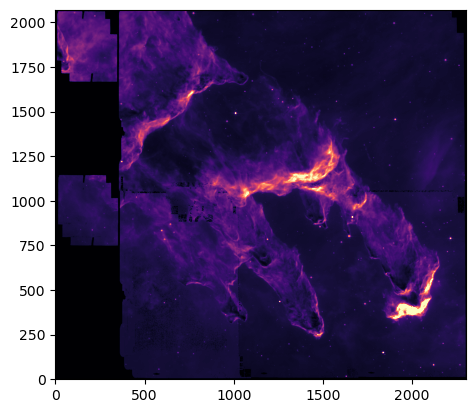

In [22]:
plt.imshow(image_couleur, cmap='magma', origin='lower', vmin=0, vmax=1)
plt.show()


Ensuite, nous afficherons notre image. Pour ajuster le rendu couleur, il est nécessaire de modifier le paramètre "cmap". À cet effet, le site de documentation de Matplotlib répertorie toutes les valeurs possibles que peut prendre "cmap".
(https://matplotlib.org/stable/users/explain/colors/colormaps.html).


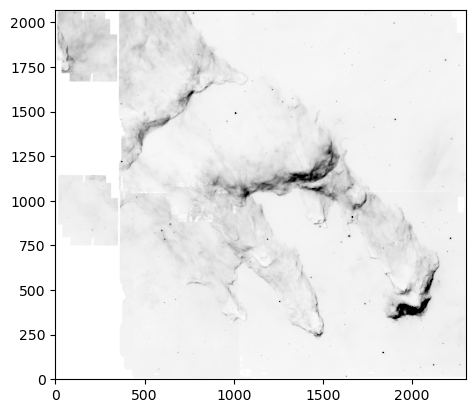

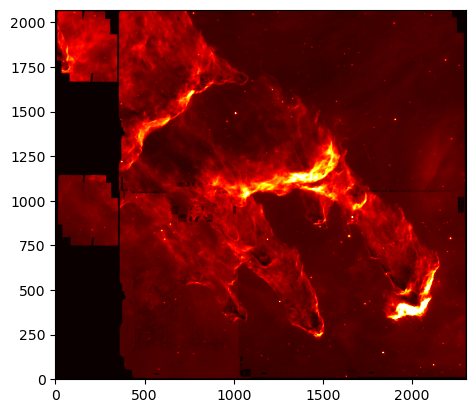

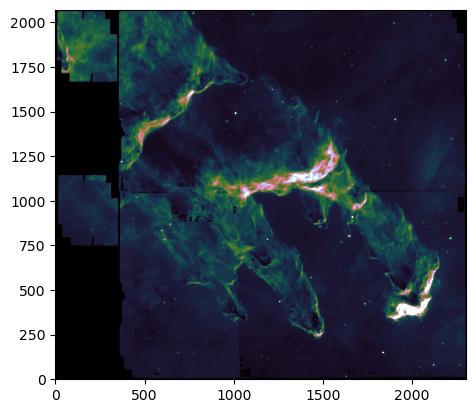

In [25]:
#Exemple avec d'autre filtres
plt.imshow(image_couleur, cmap='Greys', origin='lower', vmin=0, vmax=1)
plt.show()

plt.imshow(image_couleur, cmap='hot', origin='lower', vmin=0, vmax=1)
plt.show()

plt.imshow(image_couleur, cmap='cubehelix', origin='lower', vmin=0, vmax=1)
plt.show()